#Instructions to run this code:

##### This notebook is for EXP6 : i.e., with a grid size of 100x100 

##### This notebook can be run from start to end 

##### Please check and change the data path before running 

##### The results will be saved in the "../results/" folder 

In [1]:
#REFERENCES:
#https://medium.com/@tifa2up/image-classification-using-deep-neural-networks-a-beginner-friendly-approach-using-tensorflow-94b0a090ccd4
#https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

In [1]:
import numpy as np
import pandas as pd
import csv
import cv2
import glob
import shutil
import os
import subprocess
import random
import tensorflow
from tensorflow.keras.models import model_from_json
import sklearn
import scipy
from scipy.ndimage import rotate
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [2]:
#Change this to local path before running
data_path = '/home/dnyanadajoshi/data/'

#Conceptually global for this notebook
detect = data_path+"detection_data/"
positive_path = detect+"positive/"
negative_path = detect+"negative/"
results = "../results/"
ext = ".bmp"

#TODO: check pros and cons for os, subprocess, shutil - MAKE A NOTE SOMEWHERE
def remove_nonsquares(negative):
    
    files = glob.glob(negative+"*"+ext)
    for f in files:
        img = cv2.imread(f,0)
        if img.shape != (60,60):
            os.remove(f)
            
def create_dataset(path):
    
    files = glob.glob(data_path+"??_cropped/??_?/names_*.csv")
    subprocess.run(["mkdir", detect[:-1]])
    subprocess.run(["mkdir", positive_path[:-1]])
    subprocess.run(["mkdir", negative_path[:-1]])
    output_file = open(detect+"detection_labels.csv","w")
    writer = csv.writer(output_file)
    for fi in files:
        with open(fi,"r") as f:
            reader = csv.reader(f)
            for row in reader:
                (name, label) = tuple(row)
                label_path = negative_path
                if label == '1':
                    label_path = positive_path
                shutil.copyfile(data_path+name, label_path+name.split("/")[-1])
    remove_nonsquares(negative_path)
    files = glob.glob(positive_path+"*"+ext)
    for f in files:
        writer.writerow([f, '1'])
    files = glob.glob(negative_path+"*"+ext)
    for f in files:
        writer.writerow([f, '0'])
    output_file.close()
create_dataset(data_path)

In [3]:
def load_dataset(path, split=0.8):
    X = [[], []]
    #Y = []
    data = []
    with open(path,"r") as f:
        reader = csv.reader(f)
        for row in reader:
            (name, label) = tuple(row)
            img = name
            if label == "1":
                X[1].append(img)
            else:
                X[0].append(img)
        f.close()
        return (X)

X = load_dataset(data_path+"labels-full-100.csv")
random.shuffle(X[0])
random.shuffle(X[1])
print("Positives : ", len(X[1]))
print("Negatives : ", len(X[0]))

Positives :  748
Negatives :  294740


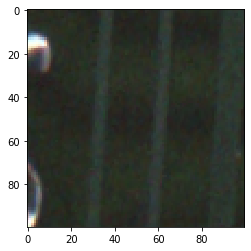

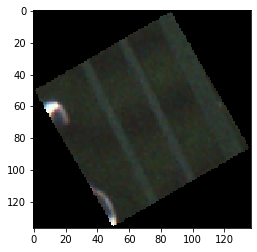

0 0
1 6
2 12
3 18
4 24
5 30
6 36
7 42
8 48
9 54
10 60
11 66
12 72
13 78
14 84
15 90
16 96
17 102
18 108
19 114
20 120
21 126
22 132
23 138
24 144
25 150
26 156
27 162
28 168
29 174
30 180
31 186
32 192
33 198
34 204
35 210
36 216
37 222
38 228
39 234
40 240
41 246
42 252
43 258
44 264
45 270
46 276
47 282
48 288
49 294
50 300
51 306
52 312
53 318
54 324
55 330
56 336
57 342
58 348
59 354
60 360
61 366
62 372
63 378
64 384
65 390
66 396
67 402
68 408
69 414
70 420
71 426
72 432
73 438
74 444
75 450
76 456
77 462
78 468
79 474
80 480
81 486
82 492
83 498
84 504
85 510
86 516
87 522
88 528
89 534
90 540
91 546
92 552
93 558
94 564
95 570
96 576
97 582
98 588
99 594
100 600
101 606
102 612
103 618
104 624
105 630
106 636
107 642
108 648
109 654
110 660
111 666
112 672
113 678
114 684
115 690
116 696
117 702
118 708
119 714
120 720
121 726
122 732
123 738
124 744
125 750
126 756
127 762
128 768
129 774
130 780
131 786
132 792
133 798
134 804
135 810
136 816
137 822
138 828
139 834
140 840
1

237 1422
238 1428
239 1434
240 1440
241 1446
242 1452
243 1458
244 1464
245 1470
246 1476
247 1482
248 1488
249 1494
250 1500
251 1506
252 1512
253 1518
254 1524
255 1530
256 1536
257 1542
258 1548
259 1554
260 1560
261 1566
262 1572
263 1578
264 1584
265 1590
266 1596
267 1602
268 1608
269 1614
270 1620
271 1626
272 1632
273 1638
274 1644
275 1650
276 1656
277 1662
278 1668
279 1674
280 1680
281 1686
282 1692
283 1698
284 1704
285 1710
286 1716
287 1722
288 1728
289 1734
290 1740
291 1746
292 1752
293 1758
294 1764
295 1770
296 1776
297 1782
298 1788
299 1794
300 1800
301 1806
302 1812
303 1818
304 1824
305 1830
306 1836
307 1842
308 1848
309 1854
310 1860
311 1866
312 1872
313 1878
314 1884
315 1890
316 1896
317 1902
318 1908
319 1914
320 1920
321 1926
322 1932
323 1938
324 1944
325 1950
326 1956
327 1962
328 1968
329 1974
330 1980
331 1986
332 1992
333 1998
334 2004
335 2010
336 2016
337 2022
338 2028
339 2034
340 2040
341 2046
342 2052
343 2058
344 2064
345 2070
346 2076
347 2082
3

In [4]:
# EXP5 : Generate unmodified augmentations on grid size 500

t_o = 6 #Total image operations: identity, rot90, rot180, rot270, flipUpDown, flipLeftRight
upper_limit = len(X[1])*t_o
del X[0][len(X[1]):]
P = len(X[1])
N = len(X[0])
dummy_img = cv2.imread(X[1][0])
plt.imshow(dummy_img)
plt.show()
plt.imshow(rotate(dummy_img, 30, reshape=True))
plt.show()
(height, width, ch) = dummy_img.shape
Xdata = np.zeros((upper_limit*2, height, width, ch), dtype=np.int8)
for i in range(N):
    img = cv2.imread(X[0][i])
    print(i, t_o*i)
    Xdata[t_o*i] = img
    Xdata[t_o*i+1] = rotate(img, 90, reshape=False)
    Xdata[t_o*i+2] = rotate(img, 180, reshape=False)
    Xdata[t_o*i+3] = rotate(img, 270, reshape=False)
    Xdata[t_o*i+4] = np.flipud(img)
    Xdata[t_o*i+5] = np.fliplr(img)
for i in range(P):
    img = cv2.imread(X[1][i])
    print(i, t_o*i)
    Xdata[upper_limit+t_o*i] = img
    Xdata[upper_limit+t_o*i+1] = rotate(img, 90, reshape=False)
    Xdata[upper_limit+t_o*i+2] = rotate(img, 180, reshape=False)
    Xdata[upper_limit+t_o*i+3] = rotate(img, 270, reshape=False)
    Xdata[upper_limit+t_o*i+4] = np.flipud(img)
    Xdata[upper_limit+t_o*i+5] = np.fliplr(img)

X = Xdata
del Xdata

#EXP2 : Synthetically augment both positives and negatives
##Separate positives and negatives
##You can change upper_limit to control number of negatives picked

upper_limit = 14000
del X[0][len(X[1]):]
X_pos = []
X_neg = []
for p in X[1]:
    img = cv2.imread(p)
    X_pos.append(img)
X_pos_arr = np.asarray(X_pos)
height = X_pos_arr[0].shape[0]
width = X_pos_arr[0].shape[1]
ch = X_pos_arr[0].shape[2]
del X_pos
for n in X[0]:
    img = cv2.imread(n)
    X_neg.append(img)
X_neg_arr = np.asarray(X_neg)
del X_neg

##Data augmentation

N = len(X[0])
P = len(X[1])
ratio = 0.5
sample_factor = int((ratio/(1-ratio))*(upper_limit/P))+1
print(P*sample_factor)
img_gen = ImageDataGenerator(rotation_range=180,horizontal_flip=True, vertical_flip=True, dtype="uint8")
pos_gen = img_gen.flow(X_pos_arr, None, batch_size=len(X[1]))
neg_gen = img_gen.flow(X_neg_arr, None, batch_size=len(X[0]))

Xdata = np.zeros((2*P*sample_factor, height, width, ch), dtype = np.int8) 
for i in range(N): 
    img = cv2.imread(X[0][i]) 
    Xdata[i] = img

    #Load positives after negatives (augmented size)
    img = cv2.imread(X[1][i])
    Xdata[upper_limit+i] = img
del X 
for i in range(sample_factor-1): 
    batch = neg_gen.next() 
    for b in range(len(batch)): 
        Xdata[N + i*b] = batch[b]

for i in range(sample_factor-1): 
    batch = pos_gen.next() 
    for b in range(len(batch)): 
        Xdata[upper_limit + N + i*b] = batch[b]

X = Xdata[:2*upper_limit]
del Xdata

#EXP1 : Synthetically augment only positives
##Separate positives and negatives

upper_limit = 14000
del X[0][upper_limit:]
X_pos = []
X_neg = []
for p in X[1]:
    img = cv2.imread(p)
    X_pos.append(img)
X_pos_arr = np.asarray(X_pos)
height = X_pos_arr[0].shape[0]
width = X_pos_arr[0].shape[1]
ch = X_pos_arr[0].shape[2]
del X_pos

##Data augmentation

N = len(X[0])
P = len(X[1])
ratio = 0.5
sample_factor = int((ratio/(1-ratio))*(upper_limit/P))+1
print(P*sample_factor)
img_gen = ImageDataGenerator(rotation_range=180,horizontal_flip=True, vertical_flip=True, dtype="uint8")
pos_gen = img_gen.flow(X_pos_arr, None, batch_size=len(X[1]))

Xdata = np.zeros((2*P*sample_factor, height, width, ch), dtype = np.int8) 
for i in range(N): 
    img = cv2.imread(X[0][i]) 
    Xdata[i] = img

del X 
for i in range(sample_factor): 
    batch = pos_gen.next() 
    for b in range(len(batch)): 
        Xdata[N + i*b] = batch[b]
X = Xdata[:2*upper_limit]
del Xdata

In [5]:
#suffix for saving data"
#Change this whenever running different experiments
EXP = "_exp6"

Xdata = np.zeros((2*P*sample_factor, height, width, ch), dtype = np.int8)
for i in range(N):
    img = cv2.imread(X[0][i])
    Xdata[i] = img
    
    #Load positives after negatives (augmented size)
    img = cv2.imread(X[1][i])
    Xdata[upper_limit+i] = img

del X
for i in range(sample_factor-1):
    batch = neg_gen.next()
    for b in range(len(batch)):
        Xdata[N + i*b] = batch[b]

for i in range(sample_factor-1):
    batch = pos_gen.next()
    for b in range(len(batch)):
        Xdata[upper_limit + N + i*b] = batch[b]

In [6]:
Y = [0 for i in range(2*upper_limit)]
for i in range(upper_limit):
    Y[upper_limit+i] = 1
Ydata = to_categorical(Y)
del Y
Xdata, Y = sklearn.utils.shuffle(X, Ydata)
#THIS IS OPTIONAL
np.save("../Augmented-data/data"+EXP, Xdata)
np.save("../Augmented-data/labels"+EXP,Y)
del X
del Ydata

In [7]:
print(Xdata.shape)

(8976, 100, 100, 3)


In [8]:
#THIS IS OPTIONAL
Xdata = np.load("../Augmented-data/data"+EXP+".npy")
Ydata = np.load("../Augmented-data/labels"+EXP+".npy")

def data_gen():
    
    batch_pos, labels_pos = aug_gen.next()
    ngen = neg_gen(Xneg, Yneg, 16)
    batch_neg, labels_neg = next(ngen)
    yield np.vstack([batch_pos, batch_neg]), np.vstack([labels_pos, labels_neg])
    
for i in range(2):
    
    #plt.imshow(np.uint8(batch[34]))
    plt.show()
    for i in range(16):
        plt.subplot(4,4,1+i)
        plt.imshow(np.uint8(Xdata[i]))
    counter += 1
    plt.show()
    print(batch.shape, labels.shape)

In [9]:
Xtrain = Xdata[:int(0.8*len(Xdata))]
Xval = Xdata[int(0.8*len(Xdata)):]
Ytrain = Ydata[:int(0.8*len(Ydata))]
Yval = Ydata[int(0.8*len(Ydata)):]
del Xdata
del Ydata

#Data generator
img_gen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, dtype="uint8")
Xtrain = X[:int(0.008*len(X))]
Xtrain = X[:10]
#Xval = X[int(0.8*len(X)):]
Ytrain = Y[:int(0.008*len(Y))]
Ytrain = Y[:10]
#Yval = Y[int(0.8*len(Y)):]
print(sum(np.argmin(Ytrain, axis=1)))
print(len(X), len(Ytrain))
batch_size = 5
train_gen = img_gen.flow(Xtrain, Ytrain, batch_size=batch_size)
#val_gen = img_gen.flow(Xval, Yval, batch_size = 32)
fig = plt.figure()
batch,labels = train_gen.next()
counter = 0
for j in range(2): 
    batch,labels = train_gen.next()
    for i in range(len(batch)):
        plt.subplot(2,5,1+i)
        plt.imshow(np.uint8(batch[i]))
    counter += 1
    plt.show()

In [10]:
(height, width, ch) = Xtrain[0].shape
def Model(learn_rate = 0.01, n_layers=1, n_feature_maps=32,  mm = 0.9, dropout = 0.0):
    model = Sequential()
    for i in range(n_layers):
        model.add(Conv2D(n_feature_maps, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(height, width, ch)))
        model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='softmax'))
    # compile model
    opt = SGD(lr=learn_rate, momentum=mm)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
#plot_model(model, to_file=results+'model.png', show_shapes=True)

In [11]:
#Use sklearn train test split, also use test data separately
model = Model(n_layers=2, dropout=0.5)
#model.fit_generator(train_gen, epochs=3,steps_per_epoch = Xtrain.shape[0]//batch_size, validation_data=(Xval, Yval), verbose = 1)
history = model.fit(x=Xtrain, y=Ytrain, batch_size=32, epochs=20, validation_data=(Xval, Yval))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 7180 samples, validate on 1796 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
7180/7180 [==============================] - 5s 730us/sample - loss: 0.5711 - acc: 0.7331 - val_loss: 0.8340 - val_acc: 0.7094
Epoch 2/20
7180/7180 [==============================] - 4s 583us/sample - loss: 0.4623 - acc: 0.7858 - val_loss: 0.5592 - val_acc: 0.7032
Epoch 3/20
7180/7180 [==============================] - 4s 585us/sample - loss: 0.3398 - acc: 0.8474 - val_loss: 0.5532 - val_acc: 0.7578
Epoch 4/20
7180/7180 [==============================] - 4s 584us/sample - loss: 0.2543 - acc: 0.8930 - val_loss: 0.6524 - val_acc: 0.7027
Epoch 5/20
7180/7180 [==============================] - 4s 585us/sample - loss: 0.1618 - acc: 0.9365 - val_loss: 1.3501 - val_acc: 0.6553
Epoch 6/20
7180/7180 [=====

In [12]:

model_json = model.to_json()
with open("../Models/model"+EXP+".json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("../Models/model"+EXP+".h5")

#Grid search 
model = KerasClassifier(build_fn=Model, epochs = 10, batch_size = 32)
lr = [0.01]
layers = [2,3]
features = [32]
dropout = [0.1, 0.5]
param_grid = dict(learn_rate=lr, n_layers = layers, n_feature_maps=features, dropout = dropout)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(Xtrain, Ytrain)
save_result = grid_result.cv_results_
print("Mean test scores: ", save_result["mean_test_score"])
print("Params: ", save_result["params"])
pickle.dump(save_result, open("../results/latest_results.p","wb"))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))
print("total time:",time()-start)

In [13]:
f = open('../Models/model'+EXP+'.json', 'r')
model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('../Models/model'+EXP+'.h5')
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
def evaluate(Xtest, Ytest, metrics):
    scores = model.evaluate(Xtest, Ytest,verbose=0)
    for m in range(len(metrics)):
        print(metrics[m],": ",scores[m])
evaluate(Xval, Yval, model.metrics_names)

loss :  1.3378680644428278
acc :  0.68207127


In [18]:
#PLEASE RUN THIS CELL TWICE TO SAVE RESULTS (BUG)
print(history.history)
val_acc = history.history['val_acc']
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
f = open("../results/results"+EXP+".csv","w")
writer = csv.writer(f)
for i in range(len(val_acc)):
    writer.writerow([acc[i], loss[i], val_acc[i], val_loss[i]])

{'loss': [0.5710614965569674, 0.46229430061861, 0.33976560349583956, 0.25429838216736456, 0.16183126208094833, 0.15491270910647587, 0.11726388011470147, 0.09125679079080026, 0.07160179595512269, 0.07072362207073438, 0.058303947343612945, 0.053660170389676576, 0.06701394591563509, 0.048564902277440244, 0.0445391538051446, 0.04130928021904942, 0.030879416346581118, 0.03378752340383641, 0.0247856906191287, 0.03486542281795885], 'acc': [0.7331476, 0.7857939, 0.84735376, 0.8930362, 0.93649024, 0.941922, 0.9544568, 0.9649025, 0.9746518, 0.9746518, 0.9785515, 0.9800836, 0.974234, 0.98259056, 0.9830084, 0.9860724, 0.9891365, 0.98774374, 0.9917827, 0.98635095], 'val_loss': [0.8340192131847475, 0.5592321048600637, 0.5532397863461339, 0.6524220646622452, 1.3500891833634578, 1.1289482518288, 1.1109992167466467, 0.8968897351957774, 0.8189134095984206, 0.7446293171291926, 0.8505006840075044, 1.3575722703954956, 0.9335982284212033, 1.0296151696440903, 1.0313549921878993, 0.7551599340741513, 0.8922250

In [19]:
df = pd.read_csv("../results/results"+EXP+".csv",header=None, names=["acc", "loss", "val_acc","val_loss"])
val_acc = list(df["val_acc"])
acc = list(df["acc"])
val_loss = list(df["val_loss"])
loss = list(df["loss"])

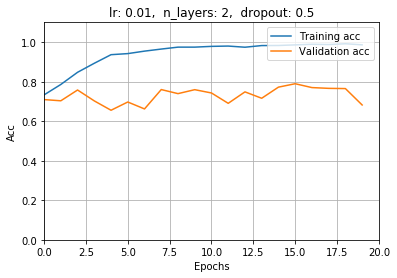

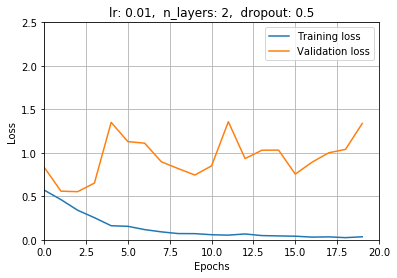

In [20]:
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.plot(df["acc"])
plt.plot(df["val_acc"])
plt.ylim(0, 1.1)
plt.xlim(0,20)
plt.title("lr: 0.01,  n_layers: 2,  dropout: 0.5")
plt.grid()
plt.legend(['Training acc','Validation acc'],loc="upper right")
plt.savefig("../results/Acc-loss-curves/acc_"+EXP+".png")
plt.show()

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(df["loss"])
plt.plot(df["val_loss"])
plt.ylim(0, 2.5)
plt.xlim(0,20)
plt.title("lr: 0.01,  n_layers: 2,  dropout: 0.5")
plt.grid()
plt.legend(['Training loss','Validation loss'],loc="upper right")
plt.savefig("../results/Acc-loss-curves/loss_"+EXP+".png")
plt.show()

Accuracy: 0.707857
Precision: 0.674935
Recall: 0.674935
ROC AUC: 0.221261
[0.0, 0.009153318077803204, 0.011441647597254004, 0.016018306636155607, 0.018306636155606407, 0.019832189168573607, 0.020594965675057208, 0.02364607170099161, 0.02517162471395881, 0.02669717772692601, 0.028985507246376812, 0.032036613272311214, 0.036613272311212815, 0.03813882532418002, 1.0]
[[411 249]
 [134 517]]
Precision:  0.674934725848564
Recall:  0.794162826420891


/home/dnyanadajoshi/anaconda3/envs/project/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


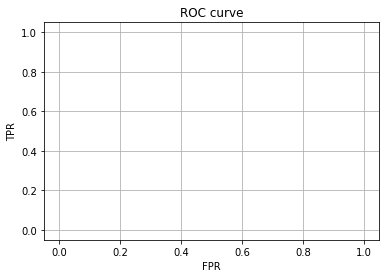

In [22]:
#Metrics
# predict probabilities for test set
from sklearn import metrics
yhat_probs = model.predict(Xval, verbose=0)[:, 0]
# predict crisp classes for test set
yhat_classes = model.predict_classes(Xval, verbose=0)
Yval_ = np.argmax(Yval, axis=1)
accuracy = accuracy_score(Yval_, yhat_classes)
tp_index = []
for i in range(30):
    if Yval_[i] and yhat_classes[i]:
        tp_index.append(i)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Yval_, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yhat_classes, Yval_)
print('Recall: %f' % recall)
fpr, tpr, thresholds = metrics.roc_curve(Yval_, yhat_probs, pos_label=2)
auc = roc_auc_score(Yval_,yhat_probs)
print('ROC AUC: %f' % auc)
print(list(fpr))
# confusion matrix
matrix = confusion_matrix(Yval_, yhat_classes)
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]
print(matrix)
plt.xlabel("FPR")
plt.ylabel("TPR")
#Fraction of predicted positives that are actually positive
print("Precision: ", TP/(TP+FP))
#Fraction of positives predicted correctly
print("Recall: ", TP/(TP+FN))
plt.plot(list(fpr),list(tpr), 'ro')
plt.title("ROC curve")
plt.grid()
plt.savefig("../results/roc_curve.png")
plt.show()

In [9]:
for i in range(len(tp_index[:10])):
    cv2.imwrite("../results/true-pos-"+str(i)+".png", np.uint8(Xval[tp_index[i]]) )